# a
The regression implementation is detailed in the file Regression.py

In [7]:
from Regression import success_for_normal_regression,success_for_ridge_regression
from scipy.io import loadmat

# b
We gather the error rates for the training sizes {10,50,100,200}

In [22]:
data = loadmat('regdata.mat')['R']
sizes = [10,50,100,200]
results = [ (size,success_for_normal_regression(size,data)) if success_for_normal_regression(size,data) is not None else (size,"Singular matrix") for size in sizes]
print(results)

[(10, 'Singular matrix'), (50, (0.03948859241305151, 1.0013941248633524)), (100, (0.10615093617767361, 0.7400597942733047)), (200, (0.2788349799642494, 0.39253860048685996))]


We see that the matrix is singular for training size 10 so we use ridge regression instead

In [23]:
results = [(size, success_for_ridge_regression(size, data,gamma=4)) for size in sizes]
print(results)

[(10, (0.026048748048560517, 1.0027536221066604)), (50, (0.043442124591918756, 0.8292887094113892)), (100, (0.11015702154100274, 0.7226210586776525)), (200, (0.28119536607506534, 0.4072472653118177))]


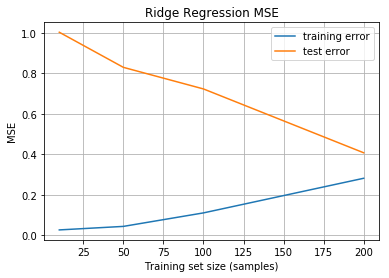

In [24]:
fig, ax = plt.subplots()
tr_err = [result[1][0] for result in results]
test_err = [result[1][1] for result in results]
ax.plot(sizes, tr_err, label="training error")
ax.plot(sizes, test_err, label="test error")
ax.set(xlabel="Training set size (samples)", ylabel="MSE",title="Ridge Regression MSE")
ax.grid()
ax.legend()
plt.show()

# c
We can see that the test error is decreasing with the increased training set size meaning we are still generalizeing. Though this might also be because the test set is becoming too small.  
Overall we 